In [6]:
%matplotlib inline



# Working with Epoch metadata

This tutorial shows how to add metadata to `~mne.Epochs` objects, and
how to use `Pandas query strings <pandas:indexing.query>` to select and
plot epochs based on metadata properties.

For this tutorial we'll use a different dataset than usual: the
`kiloword-dataset`, which contains EEG data averaged across 75 subjects
who were performing a lexical decision (word/non-word) task. The data is in
`~mne.Epochs` format, with each epoch representing the response to a
different stimulus (word). As usual we'll start by importing the modules we
need and loading the data:


In [10]:
import numpy as np
import pandas as pd
import mne

kiloword_data_folder = mne.datasets.kiloword.data_path()
kiloword_data_folder

'/home/nahuel/mne_data/MNE-kiloword-data'

In [13]:
kiloword_data_file = kiloword_data_folder + '/kword_metadata-epo.fif'
epochs = mne.read_epochs(kiloword_data_file)

Reading /home/nahuel/mne_data/MNE-kiloword-data/kword_metadata-epo.fif ...
Isotrak not found
    Found the data of interest:
        t =    -100.00 ...     920.00 ms
        0 CTF compensation matrices available
Adding metadata with 8 columns
Replacing existing metadata with 8 columns
960 matching events found
No baseline correction applied
0 projection items activated


## Viewing ``Epochs`` metadata

.. admonition:: Restrictions on metadata DataFrames
   :class: sidebar warning

   Metadata dataframes are less flexible than typical
   :class:`Pandas DataFrames <pandas.DataFrame>`. For example, the allowed
   data types are restricted to strings, floats, integers, or booleans;
   and the row labels are always integers corresponding to epoch numbers.
   Other capabilities of :class:`DataFrames <pandas.DataFrame>` such as
   :class:`hierarchical indexing <pandas.MultiIndex>` are possible while the
   `~mne.Epochs` object is in memory, but will not survive saving and
   reloading the `~mne.Epochs` object to/from disk.

The metadata attached to `~mne.Epochs` objects is stored as a
:class:`pandas.DataFrame` containing one row for each epoch. The columns of
this :class:`~pandas.DataFrame` can contain just about any information you
want to store about each epoch; in this case, the metadata encodes
information about the stimulus seen on each trial, including properties of
the visual word form itself (e.g., ``NumberOfLetters``, ``VisualComplexity``)
as well as properties of what the word means (e.g., its ``Concreteness``) and
its prominence in the English lexicon (e.g., ``WordFrequency``). Here are all
the variables; note that in a Jupyter notebook, viewing a
:class:`pandas.DataFrame` gets rendered as an HTML table instead of the
normal Python output block:



In [14]:
epochs.metadata

,WORD,Concreteness,WordFrequency,OrthographicDistance,NumberOfLetters,BigramFrequency,ConsonantVowelProportion,VisualComplexity
0,film,5.450000,3.189490,1.75,4.0,343.250,0.750,55.783710
1,cent,5.900000,3.700704,1.35,4.0,546.750,0.750,63.141553
2,shot,4.600000,2.858537,1.20,4.0,484.750,0.750,64.600033
3,cold,3.700000,3.454540,1.15,4.0,1095.250,0.750,63.657457
4,main,3.000000,3.539076,1.35,4.0,686.000,0.500,68.945661
...,...,...,...,...,...,...,...,...
955,drudgery,3.473684,1.556303,2.95,8.0,486.125,0.625,69.732357
956,reversal,3.700000,1.991226,2.65,8.0,859.000,0.625,60.545879
957,billiard,5.500000,1.672098,2.90,8.0,528.875,0.625,55.838597
958,adherent,3.450000,0.698970,2.55,8.0,615.625,0.625,68.088112


Viewing the metadata values for a given epoch and metadata variable is done
using any of the `Pandas indexing <pandas:/reference/indexing.rst>`
methods such as :obj:`~pandas.DataFrame.loc`,
:obj:`~pandas.DataFrame.iloc`, :obj:`~pandas.DataFrame.at`,
and :obj:`~pandas.DataFrame.iat`. Because the
index of the dataframe is the integer epoch number, the name- and index-based
selection methods will work similarly for selecting rows, except that
name-based selection (with :obj:`~pandas.DataFrame.loc`) is inclusive of the
endpoint:



In [15]:
print('Name-based selection with .loc')
print(epochs.metadata.loc[2:4])

print('\nIndex-based selection with .iloc')
print(epochs.metadata.iloc[2:4])

Name-based selection with .loc
   WORD  Concreteness  WordFrequency  OrthographicDistance  NumberOfLetters  \
2  shot           4.6       2.858537                  1.20              4.0   
3  cold           3.7       3.454540                  1.15              4.0   
4  main           3.0       3.539076                  1.35              4.0   

   BigramFrequency  ConsonantVowelProportion  VisualComplexity  
2           484.75                      0.75         64.600033  
3          1095.25                      0.75         63.657457  
4           686.00                      0.50         68.945661  

Index-based selection with .iloc
   WORD  Concreteness  WordFrequency  OrthographicDistance  NumberOfLetters  \
2  shot           4.6       2.858537                  1.20              4.0   
3  cold           3.7       3.454540                  1.15              4.0   

   BigramFrequency  ConsonantVowelProportion  VisualComplexity  
2           484.75                      0.75         64

## Modifying the metadata

Like any :class:`pandas.DataFrame`, you can modify the data or add columns as
needed. Here we convert the ``NumberOfLetters`` column from :class:`float` to
:class:`integer <int>` data type, and add a :class:`boolean <bool>` column
that arbitrarily divides the variable ``VisualComplexity`` into high and low
groups.



In [16]:
epochs.metadata['NumberOfLetters'] = \
    epochs.metadata['NumberOfLetters'].map(int)

epochs.metadata['HighComplexity'] = epochs.metadata['VisualComplexity'] > 65
epochs.metadata.head()

,WORD,Concreteness,WordFrequency,OrthographicDistance,NumberOfLetters,BigramFrequency,ConsonantVowelProportion,VisualComplexity,HighComplexity
0,film,5.45,3.189490,1.75,4,343.25,0.75,55.783710,False
1,cent,5.90,3.700704,1.35,4,546.75,0.75,63.141553,False
2,shot,4.60,2.858537,1.20,4,484.75,0.75,64.600033,False
3,cold,3.70,3.454540,1.15,4,1095.25,0.75,63.657457,False
4,main,3.00,3.539076,1.35,4,686.00,0.50,68.945661,True


## Selecting epochs using metadata queries

All `~mne.Epochs` objects can be subselected by event name, index, or
:term:`slice` (see `tut-section-subselect-epochs`). But
`~mne.Epochs` objects with metadata can also be queried using
`Pandas query strings <pandas:indexing.query>` by passing the query
string just as you would normally pass an event name. For example:



In [17]:
print(epochs['WORD.str.startswith("dis")'])

<EpochsFIF |  8 events (all good), -0.1 - 0.92 sec, baseline off, ~499 kB, data loaded, with metadata,
 'disarray': 1
 'disaster': 1
 'discord': 1
 'disease': 1
 'display': 1
 'disposal': 1
 'distance': 1
 'district': 1>


This capability uses the :meth:`pandas.DataFrame.query` method under the
hood, so you can check out the documentation of that method to learn how to
format query strings. Here's another example:



In [18]:
print(epochs['Concreteness > 6 and WordFrequency < 1'])

<EpochsFIF |  4 events (all good), -0.1 - 0.92 sec, baseline off, ~267 kB, data loaded, with metadata,
 'banjo': 1
 'corsage': 1
 'lasso': 1
 'tentacle': 1>


Note also that traditional epochs subselection by condition name still works;
MNE-Python will try the traditional method first before falling back on rich
metadata querying.



    Using multitaper spectrum estimation with 7 DPSS windows


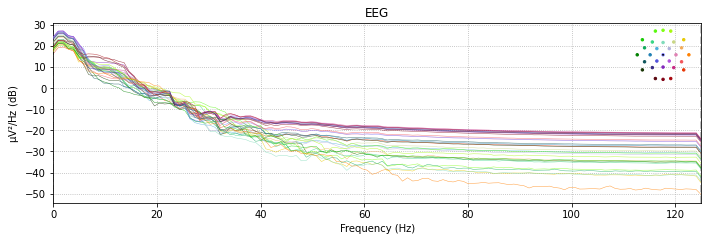

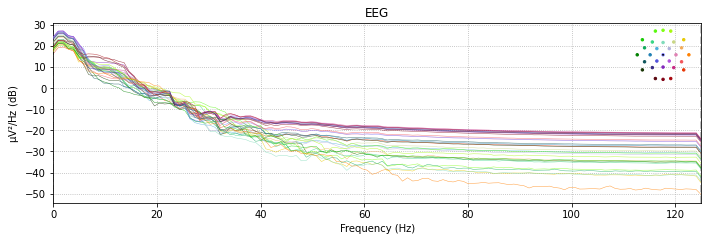

In [19]:
epochs['solenoid'].plot_psd()

One use of the Pandas query string approach is to select specific words for
plotting:



Using matplotlib as 2D backend.


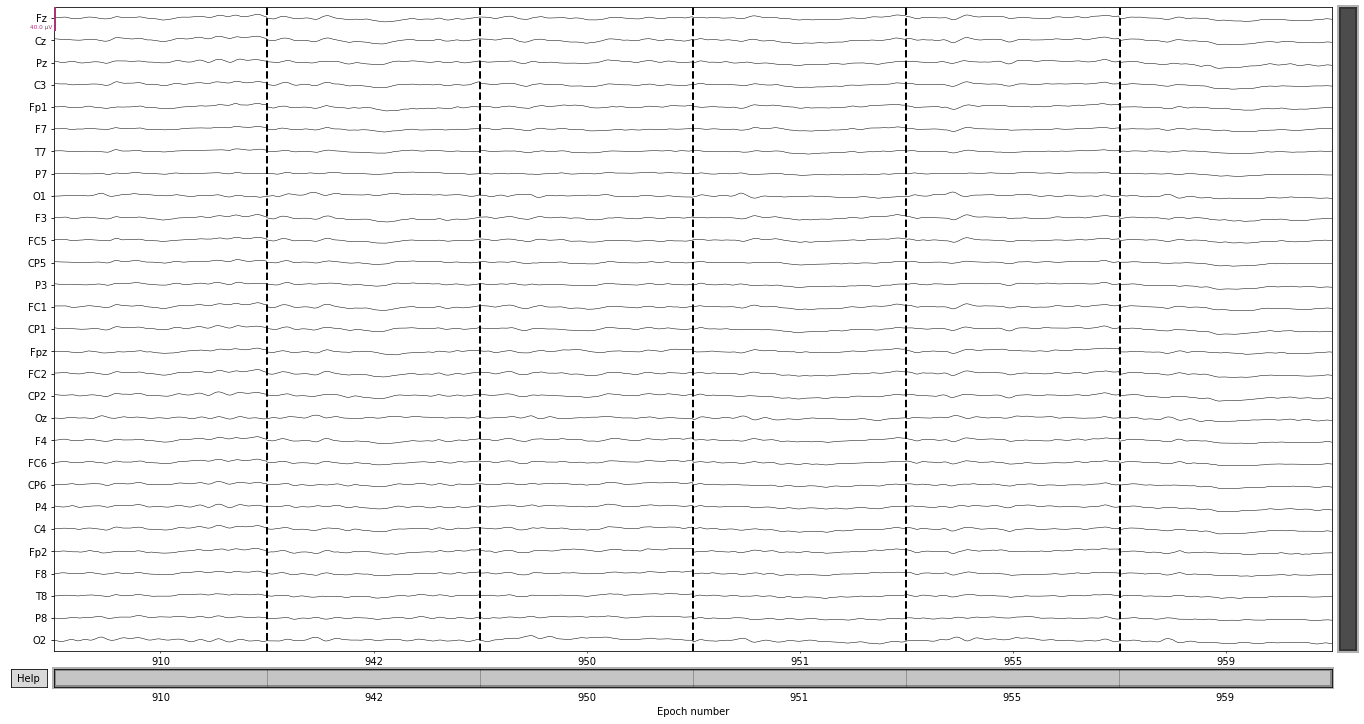

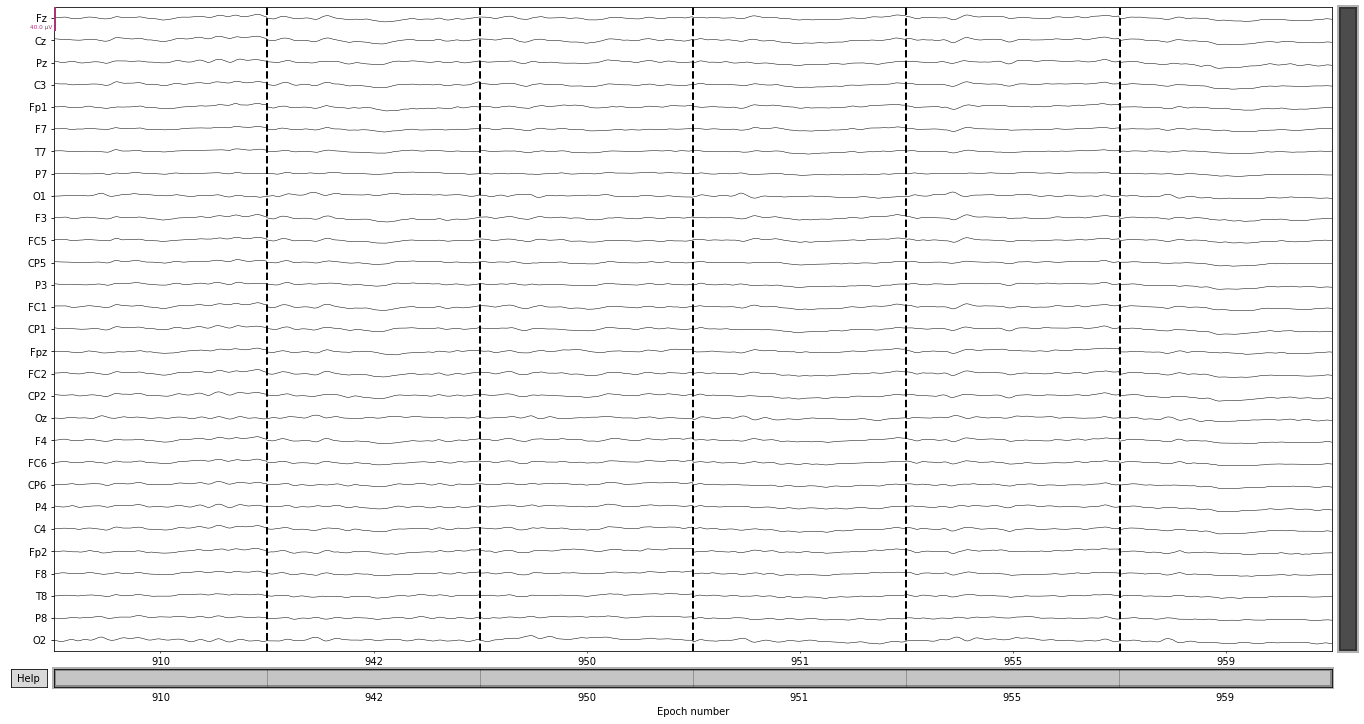

In [20]:
words = ['typhoon', 'bungalow', 'colossus', 'drudgery', 'linguist', 'solenoid']
epochs['WORD in {}'.format(words)].plot(n_channels=29)

Notice that in this dataset, each "condition" (A.K.A., each word) occurs only
once, whereas with the `sample-dataset` dataset each condition (e.g.,
"auditory/left", "visual/right", etc) occurred dozens of times. This makes
the Pandas querying methods especially useful when you want to aggregate
epochs that have different condition names but that share similar stimulus
properties. For example, here we group epochs based on the number of letters
in the stimulus word, and compare the average signal at electrode ``Pz`` for
each group:



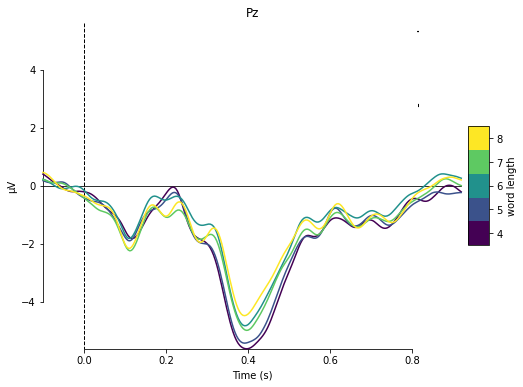

[<Figure size 576x432 with 3 Axes>]

In [30]:
evokeds = dict()
query = 'NumberOfLetters == {}'
for n_letters in epochs.metadata['NumberOfLetters'].unique():
    evokeds[str(n_letters)] = epochs[query.format(n_letters)].average()

mne.viz.plot_compare_evokeds(evokeds, cmap=('word length', 'viridis'),
                             picks='Pz')

In [29]:
type(evokeds['4'])

mne.evoked.EvokedArray

Metadata can also be useful for sorting the epochs in an image plot. For
example, here we order the epochs based on word frequency to see if there's a
pattern to the latency or intensity of the response:



In [ ]:
sort_order = np.argsort(epochs.metadata['WordFrequency'])
epochs.plot_image(order=sort_order, picks='Pz')

Although there's no obvious relationship in this case, such analyses may be
useful for metadata variables that more directly index the time course of
stimulus processing (such as reaction time).


## Adding metadata to an ``Epochs`` object

You can add a metadata :class:`~pandas.DataFrame` to any
`~mne.Epochs` object (or replace existing metadata) simply by
assigning to the :attr:`~mne.Epochs.metadata` attribute:



In [ ]:
new_metadata = pd.DataFrame(data=['foo'] * len(epochs), columns=['bar'],
                            index=range(len(epochs)))
epochs.metadata = new_metadata
epochs.metadata.head()

You can remove metadata from an `~mne.Epochs` object by setting its
metadata to ``None``:



In [ ]:
epochs.metadata = None